In [13]:
os.listdir('Images_filtered/image_0')

['low', 'high', 'medium']

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import visualization as vis
import utilities as utils
import os
from sklearn.metrics import mean_squared_error


In [15]:
def imshow(image):
    
    # Display the image in the notebook
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

erge

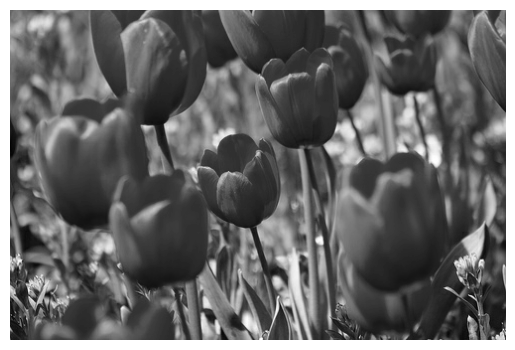

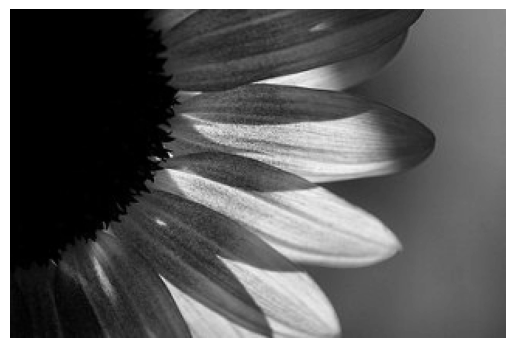

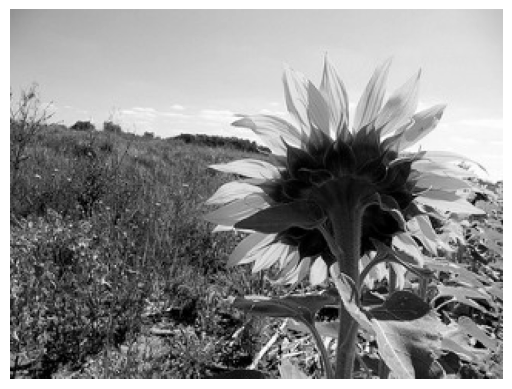

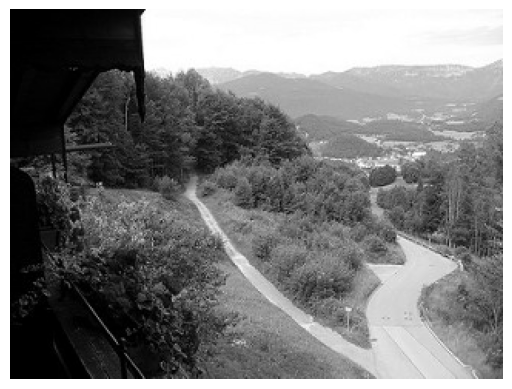

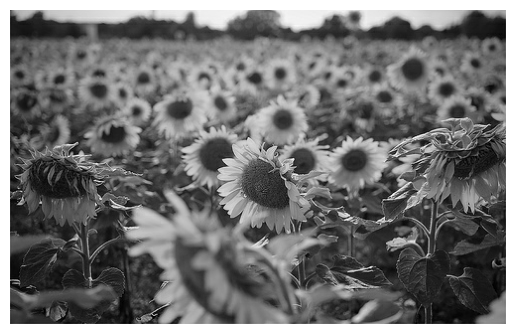

In [16]:
list_of_images = []
PATH = 'images'

images_dir = os.listdir(PATH)
images_dir.sort()
# Iterate over images
for images in images_dir:  # Taking first 10 images for example
    image = cv2.imread(os.path.join(PATH, images), cv2.IMREAD_GRAYSCALE)
    # Convert from RGB to Grayscale using OpenCV
    list_of_images.append(image)
    
    imshow(image)


In [17]:
dataframes = []

for image in list_of_images:
    df = utils.create_dataframe_image(image)
    dataframes.append(df)

# ex = dataframes[4].loc['Salt_and_Pepper_prob_0.05', 'Image']
# Display the image in the notebook
# imshow(ex)



In [18]:
# Iterate over all images and save in a tree structured directory

kernel_sizes = [(2*i + 1) for i in range(1, 20)]

utils.create_or_replace_dir('Images_filtered')


for i in range(len(dataframes)):
    utils.save_filtered_images(dataframes[i], f'image_{i}', kernel_sizes=kernel_sizes)

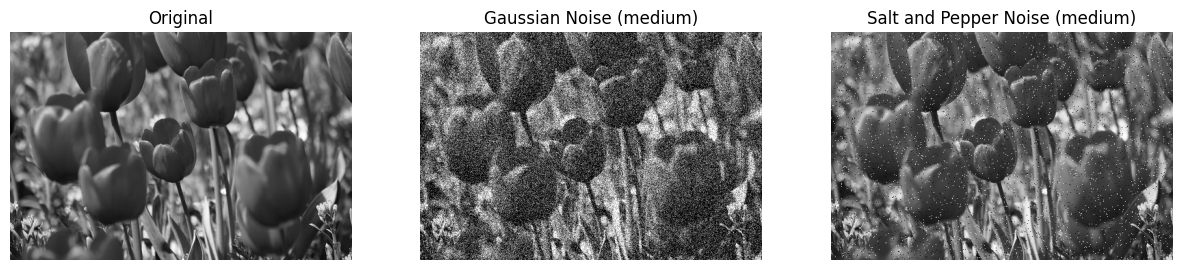

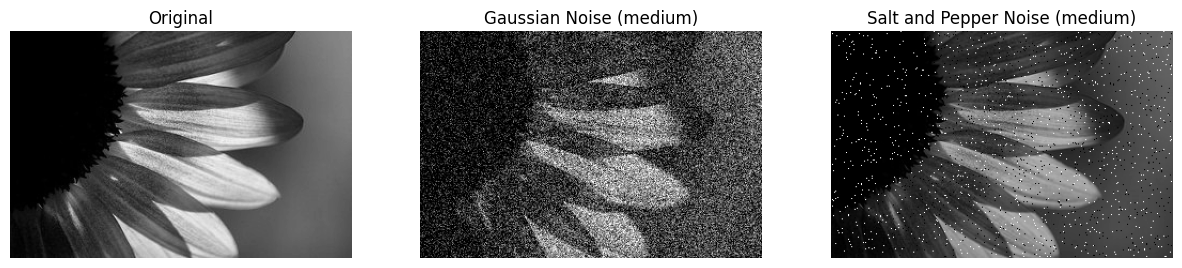

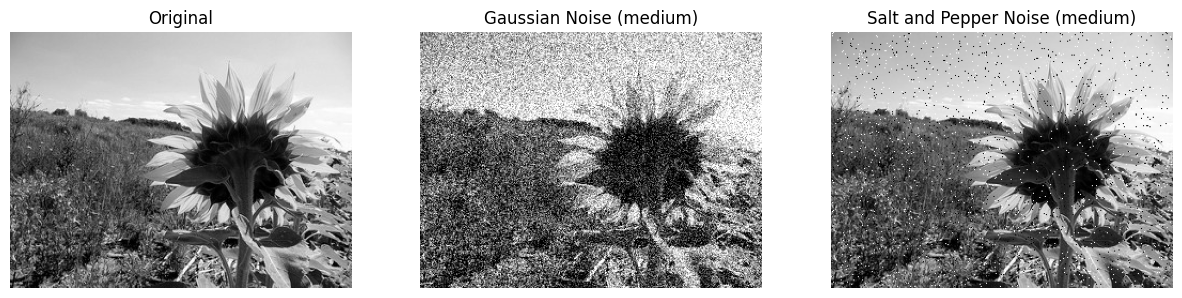

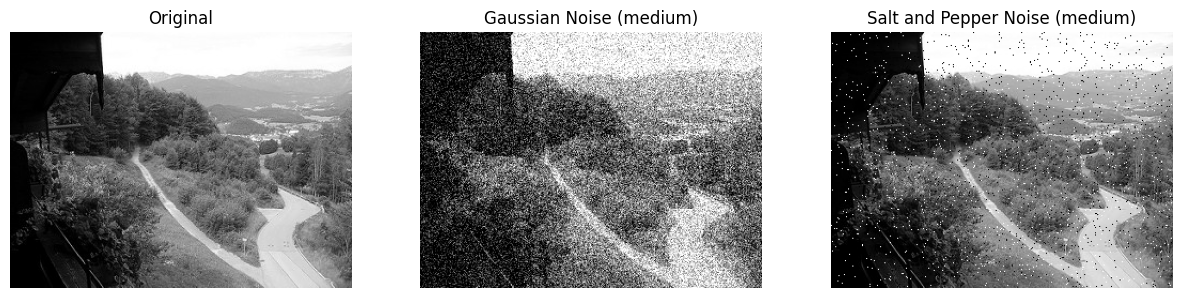

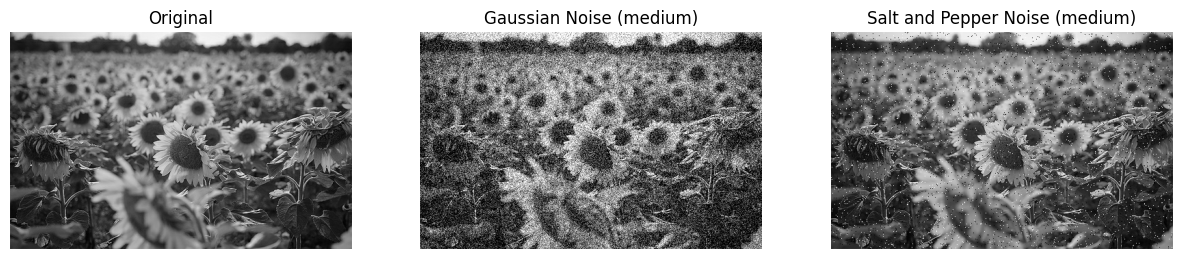

In [19]:
# Define the noise types to display

noise_types = ['Gaussian Noise (medium)', 'Salt and Pepper Noise (medium)']

# Iterate over all images
for i, image in enumerate(list_of_images):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Display the noisy variants
    for j, noise_type in enumerate(noise_types):
        noisy_image = dataframes[i].loc[noise_type, 'Image']
        axes[j + 1].imshow(noisy_image, cmap='gray')
        axes[j + 1].set_title(noise_type)
        axes[j + 1].axis('off')
    
    plt.show()

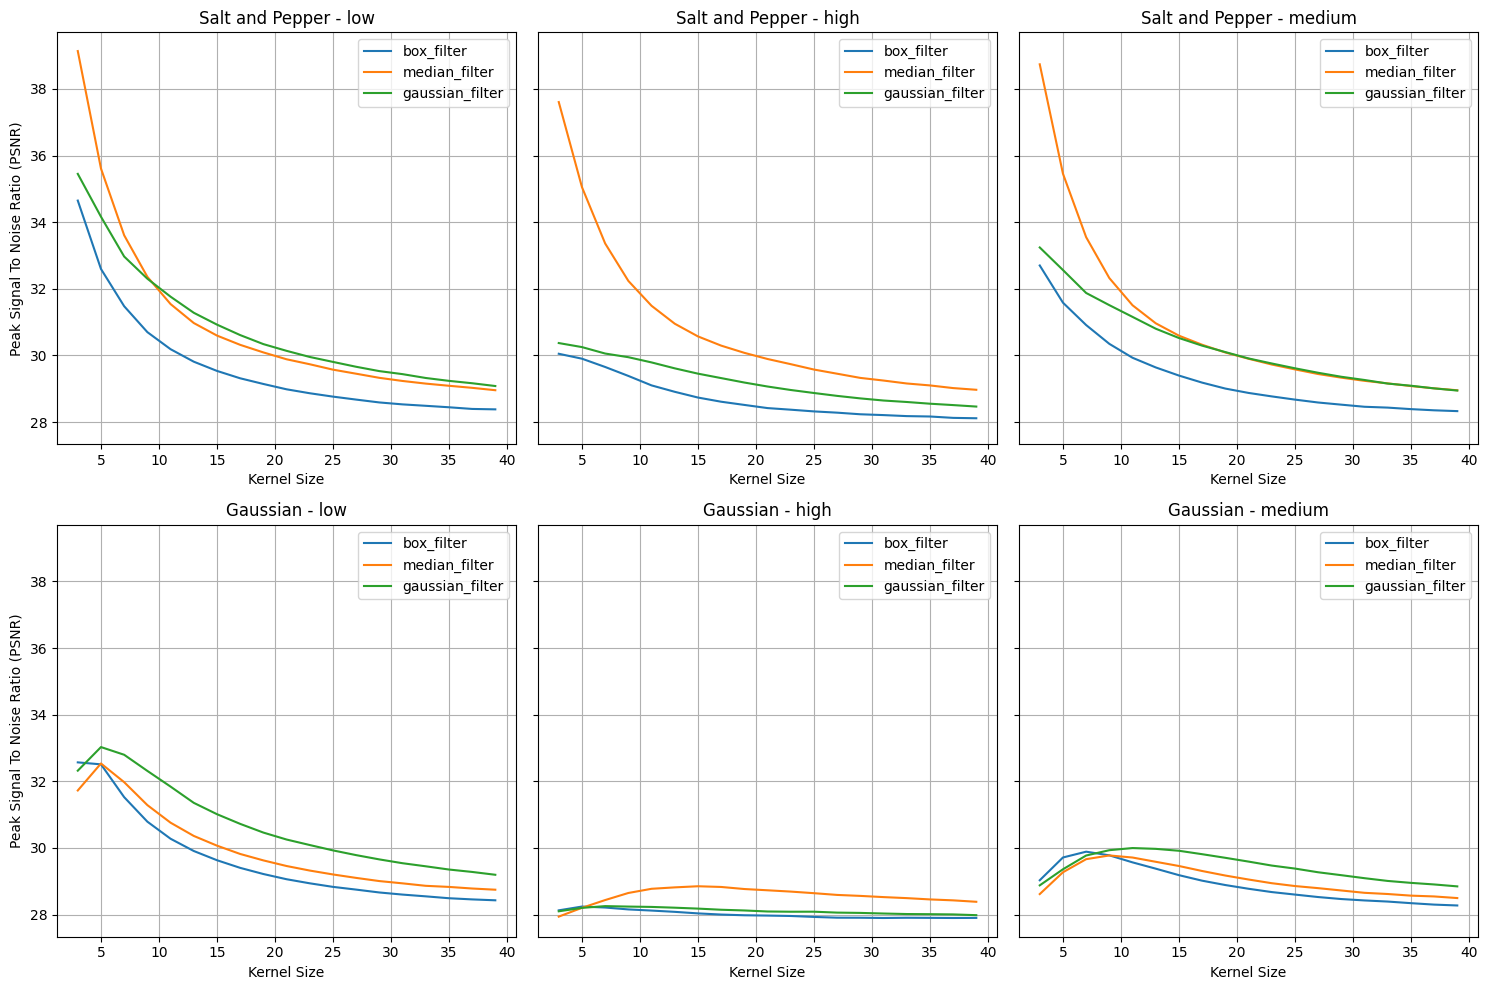

In [20]:
base_dir = 'Images_filtered'
original_image_name = 'image_0'
original_image = dataframes[0].loc['no_noise', 'Image']
""
noise_levels = os.listdir(os.path.join(base_dir, original_image_name))
noise_types = os.listdir(os.path.join(base_dir, original_image_name, noise_levels[0]))
filter_types = os.listdir(os.path.join(base_dir, original_image_name, noise_levels[0], noise_types[0]))

psnr_dict_outer, kernels = utils.collect_metric_values_for_all_filters_and_noise_types(utils.calculate_psnr,
                                                                                        base_dir,
                                                                                        original_image_name,
                                                                                        original_image
                                                                                      )

utils.plot_metric_vs_kernel(psnr_dict_outer,
                            'Peak Signal To Noise Ratio (PSNR)',
                            noise_levels, filter_types,
                            kernels
                            )

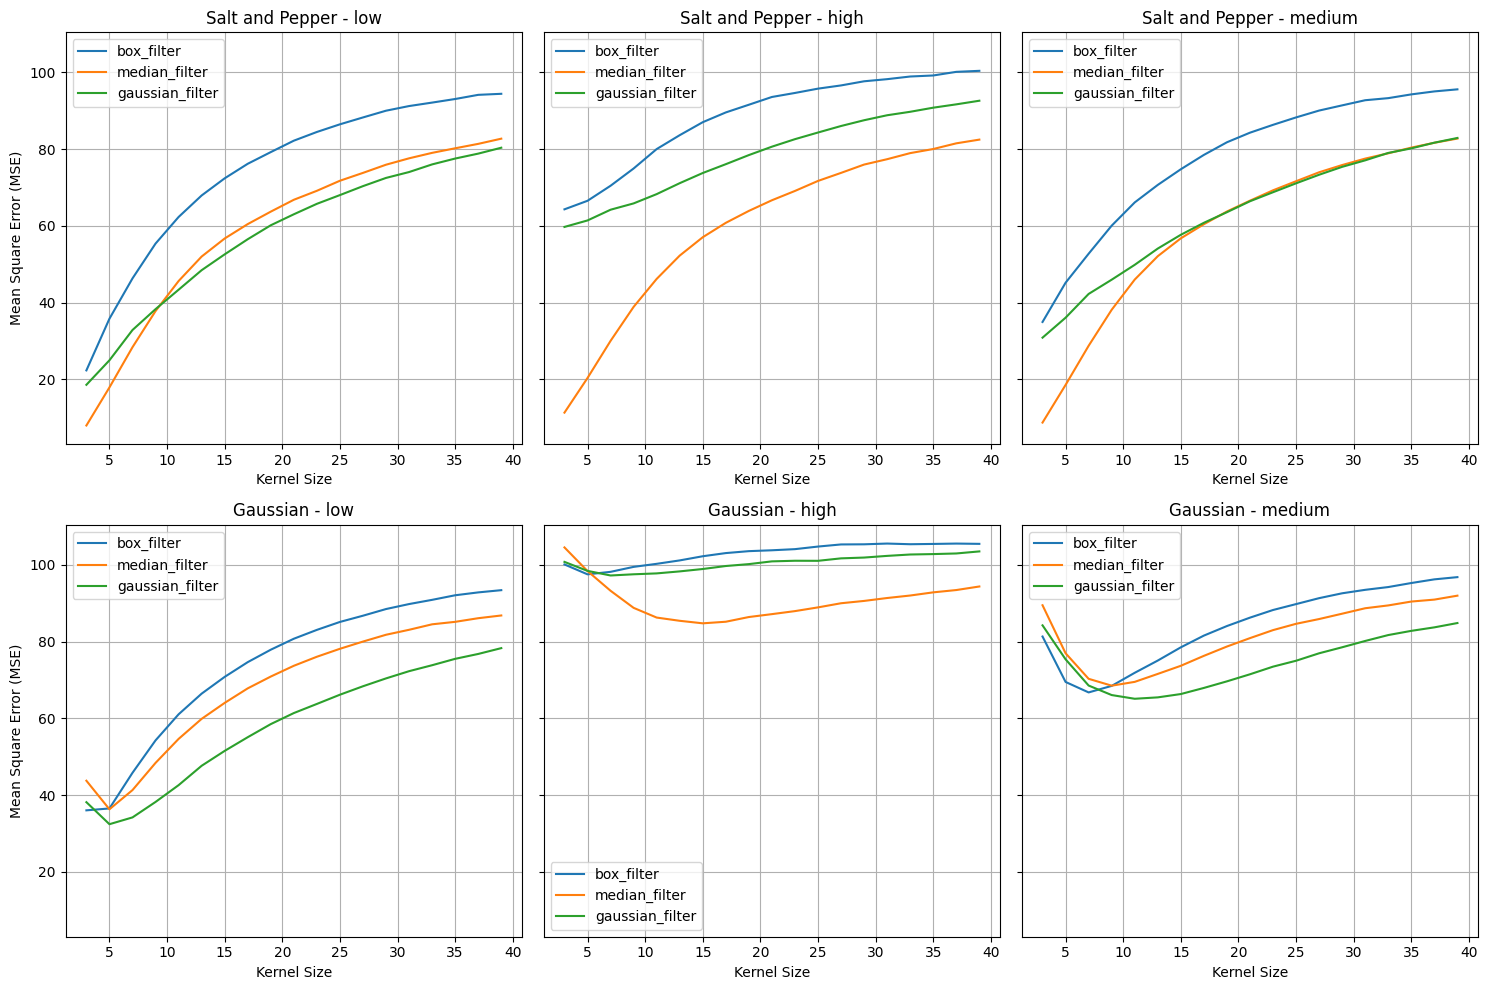

In [25]:
mse_dict_outer, kernels = utils.collect_metric_values_for_all_filters_and_noise_types(mean_squared_error, 
                                    base_dir, 
                                    original_image_name, 
                                    original_image
                                )

utils.plot_metric_vs_kernel(mse_dict_outer,'Mean Square Error (MSE)', noise_levels, filter_types, kernels)